#### IMPORTING LIBRARYS 

In [3]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt  


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split 
from sklearn.decomposition import PCA
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

#### PREPARING DATA

In [44]:
datas = load_digits() 
X= datas.data 
y=datas.target 
df_digits=pd.DataFrame(data=X,columns=datas.feature_names)
df_digits['target']=y
df_digits=df_digits.sample(frac=1) 
df_digits 
datas

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

#### VISUALIZING DATA

c:\Users\Leonardo\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\Leonardo\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


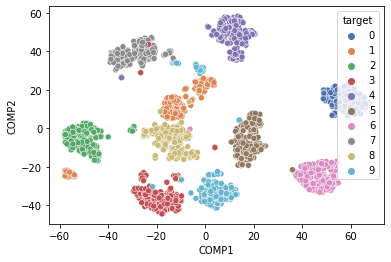

In [22]:
tsne=TSNE(n_components=2,random_state=200) 

array_red=tsne.fit_transform(X)

df_tsne=pd.DataFrame(array_red,columns=['COMP1','COMP2'])

df_tsne['target']=y 

sns.scatterplot(data=df_tsne,x="COMP1",y="COMP2",hue="target",palette="deep") 
plt.show()

#### training model

In [40]:
def getModel(): 
    return LogisticRegression(max_iter=10000) 
    #return RandomForestClassifier() 
    #return KNeighborsClassifier()

In [42]:
scores = cross_val_score(getModel(),X,y,cv=10)

print('accuracy cv = ',np.mean(scores)) 
scores

accuracy cv =  0.9276443202979516


array([0.90555556, 0.95555556, 0.88333333, 0.93333333, 0.93888889,
       0.95      , 0.95      , 0.93296089, 0.88268156, 0.94413408])

#### VISUALIZING CONFUSION MATRIX

In [53]:
y_pred=cross_val_predict(getModel(),X,y,cv=10)

cm=confusion_matrix(y,y_pred) 

disp=ConfusionMatrixDisplay(confusion_matrix= cm) 

disp.plot()

plt.show()


1797